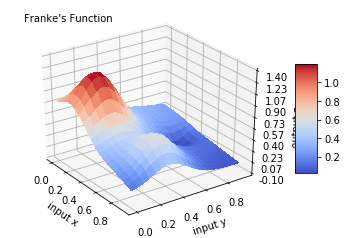

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np 
from random import random, seed
#%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
a = np.arange(0, 1, 0.05)
b = np.arange(0, 1, 0.05) 
a, b = np.meshgrid(a,b)
def FrankeFunction(a,b):
    term1 = 0.75*np.exp(-(0.25*(9*a-2)**2) - 0.25*((9*b-2)**2))
    term2 = 0.75*np.exp(-((9*a+1)**2)/49.0 - 0.1*(9*b+1))
    term3 = 0.5*np.exp(-(9*a-7)**2/4.0 - 0.25*((9*b-3)**2))
    term4 = -0.2*np.exp(-(9*a-4)**2 - (9*b-7)**2) 
    return term1 + term2 + term3 + term4
c = FrankeFunction(a, b)

# Plot the surface.
surf = ax.plot_surface(a, b, c, cmap=cm.coolwarm, linewidth=0, antialiased=False)

 
# Set rotation angle to -35 degrees
ax.view_init(azim=-35)


# Customize the axis.
ax.text2D(0.05, 0.95, "Franke's Function", transform=ax.transAxes)
plt.xlabel('input x')
plt.ylabel('input y')
ax.set_zlabel('output z')
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()



In [3]:
#import various packages
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [4]:
# use seed=1 to reproduce results
np.random.seed(0)

# creating the data
x = np.random.uniform(0,1,1000) 
y = np.random.uniform(0,1,1000)
noise=0.01*np.random.randn(1000)
z = FrankeFunction(x, y) + noise


    

#creating functions for the task

In [5]:
# function calculating the mean value of a given dataset (equivalent to the integrated mean function)

def samplemean(z):
    #input  : given outcome of experiment
    #output : mean value  
    length = len(z)
    samplemeann = 0
    for k in range(0,length):
        samplemeann = samplemeann+z[k]
        
    samplemeann = (1.0/len(z))*samplemeann
    return samplemeann

In [6]:
def centered(x):
    #input  : vector that should be centered
    #output : centered vector
    sm = samplemean(x)
    c=x-samplemean(x)
    
    return c
    

In [7]:
# centering the datasets
z_=z
intercept=samplemean(z)
x=centered(x)
y=centered(y)
z=centered(z)

In [8]:
# function that creates the designmatrix for two given input features

def designmatrix(x,y,degree):            
    #input1 : x-vector
    #input2 : y-vector
    #input3 : degree of polynomial for fit
    #output : Matrix X as defined in the lecture (in this particular case: up to degree 5 and mixed terms)
    
    lengthx = len(x)
    
    if degree == 5:
        X = np.c_[x,y,x**2,x*y,y**2, \
                  x**3, x**2*y, x*y**2, y**3, \
                  x**4, x**3*y, x**2*y**2, x*y**3,y**4, \
                  x**5, x**4*y, x**3*y**2, x**2*y**3,x*y**4, y**5]
            
    
    if degree == 4:
        X = np.c_[x,y,x**2,x*y,y**2, \
                  x**3, x**2*y, x*y**2, y**3, \
                  x**4, x**3*y, x**2*y**2, x*y**3,y**4]
           
            
    if degree == 3:
         X = np.c_[x,y,x**2,x*y,y**2, \
                  x**3, x**2*y, x*y**2, y**3]
                
            
    if degree == 2:
        X = np.c_[x,y,x**2,x*y,y**2]
            
           
    return X

In [11]:
# setting lamda to a test value lamda=0.001 before cross validation
lamda = 0.001

In [12]:
#function that returns ridge regression coefficients for centered data

def betaridge(x,y,z,degree,lamda):             
    #input1 : indput data vector 1
    #input2 : indput data vector 2
    #input3 : target data vector
    #input4 : degree of polynomial for fit
    #input5 : chosen penalty
    #output : coefficients for polynomial fit of ridge regression
   
    #function for designmatrix is definded before (without the first columns consisting of ones)
    X = designmatrix(x,y,degree) 
    XtX = np.transpose(X).dot(X)
    ID = np.identity(XtX.shape[0])
    
    # Calculation of beta
    
    # intercept b[0] is calculated before as mean of target data
    betaridge0 = np.empty(1)                                                    
    betaridge0[0] = intercept                   
    betaridge2 = (np.linalg.inv(XtX+lamda*ID).dot(np.transpose(X))).dot(z)  # without b[0]
    betaridge=np.concatenate((betaridge0,betaridge2),axis=0)  

    return betaridge 

In [17]:
# function that predicts target values based on a model fitted to inputs x&y and true values z

def zpredict_f(x,y,z,degree,lamda):          
    #input1 : x-vector
    #input2 : y-vector
    #input3 : given observed data z
    #input4 : degree of polynomial for fit
    #output : predicted values with linear regression coefficients calculated with x,y
    
    X = np.c_[np.ones((len(x),1)),designmatrix(x,y,degree)]
    beta=betaridge(x,y,z,degree,lamda)
    
    zpredict = X.dot(beta)

    
    return zpredict

In [18]:
# function calculating the mean squared error 
def MSE(z,zpredict):
    #input1 : given outcome
    #input2 : predicted outcome
    #output : Mean Squared Error
    length = len(z)
    MSE = 0
    for j in range(0,length) :
        term = (z[j]-zpredict[j])**2
        MSE = MSE + term
    MSE = (1.0/length*MSE)
    return MSE

# function calculating the R^2 score
def R2score(z,zpredict):     
    #input1: given outcome of experiment
    #input2: predicted outcome of experiment
    #output: R2 score
    
    lengthz = len(z)
    sum1=0
    for k in range(0,lengthz):
        sum1=sum1+(z[k]-samplemean(z))**2
    
    R2score = 1 - ((MSE(z,zpredict)*lengthz)/(sum1))
    return R2score

# function that calculates an unbiased estimate of the variance according to Hastie et al. formula (3.8) p.47
def estvar(x,y,z,degree,lamda):                          
    #input1 : x-vector
    #input2 : y-vector
    #input3 : given outcome of experiment
    #input4 : degree of polynomial for fit
    #output : estimated variance
    p = np.array([6,10,15,21])
    p = p[degree-2]
    length = len(z)
    zpredictdeg = zpredict_f(x,y,z,degree,lamda)
    estvar = 0
    for k in range(0,length):
        estvar = estvar + (z_[k]-zpredictdeg[k])**2
    estvar=(1.0/(length-p-1))*estvar
    return estvar

# function calculating the variance of the ridge regression parameters
def betavariancer(x,y,z,degree,lamda):
    #input1 : x-vector
    #input2 : y-vector
    #input3 : given observed data z
    #input4 : degree of polynomial for fit
    #input5 : chosen penalty
    #output : coefficients for polynomial fit of ridge regression
   
    X = designmatrix(x,y,degree)
    XtX = np.transpose(X).dot(X)
    ID = np.identity(XtX.shape[0])
    Xlamdainvers = np.linalg.inv(XtX+lamda*ID) 
    betavariance=np.transpose(X).dot(z) 
    lengthb=len(betavariance)
    for k in range(0,lengthb):
        betavariance[k]=Xlamdainvers[k][k]*estvar(x,y,z,degree,lamda)
    
    return betavariance

-----------------------------------------------------------------------------------
Ridge overview: Lamda = 0.001

degree2 
   MSE   :  0.01626582052076974
   R2    :  0.80642464389259
degree3 
   MSE   :  0.0073965863220073645
   R2    :  0.9119751241916435
degree4 
   MSE   :  0.004382334200742211
   R2    :  0.9478469652110602
degree5 
   MSE   :  0.002718640726922145
   R2    :  0.9676461543289451

Variance of the parameters beta - deg = 5
betaridge:  [ 0.39706  -0.333657 -1.477908  1.646034  1.848309 -0.00899  -0.312337
 -1.829715 -4.986636  6.921563 -8.346137 -4.885244  1.177381 -1.713105
 -2.117947  2.488455 12.51715   8.299151 -2.638225 10.91646  -8.275152]
Var(beta):  [0.000687 0.000655 0.004378 0.00453  0.003847 0.100198 0.069308 0.069403
 0.098235 0.105516 0.091302 0.066499 0.086273 0.095376 1.127625 0.976085
 0.9202   0.890925 0.909344 1.090218]
------------------------------------------------------------------------------------


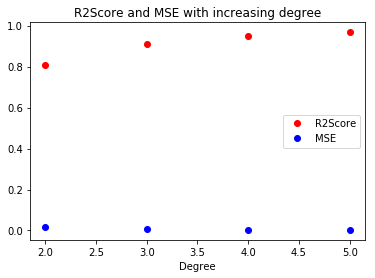

In [19]:
#Overview over degrees, coefficient size and variance

zpredict5 = zpredict_f(x,y,z,5,lamda)
MSE5 = MSE(z_,zpredict5)
R2score5 = R2score(z_,zpredict5)

zpredict4 = zpredict_f(x,y,z,4,lamda)
MSE4 = MSE(z_,zpredict4)
R2score4 = R2score(z_,zpredict4)

zpredict3 = zpredict_f(x,y,z,3,lamda)
MSE3 = MSE(z_,zpredict3)
R2score3 = R2score(z_,zpredict3)

zpredict2 = zpredict_f(x,y,z,2,lamda)
MSE2 = MSE(z_,zpredict2)
R2score2 = R2score(z_,zpredict2)


print('-----------------------------------------------------------------------------------')
print('Ridge overview: Lamda =', lamda)
print('')
print('degree2 ')
print('   MSE   : ',MSE2)
print('   R2    : ' ,R2score2)
print('degree3 ')
print('   MSE   : ',MSE3)
print('   R2    : ' ,R2score3)
print('degree4 ')
print('   MSE   : ',MSE4)
print('   R2    : ' ,R2score4)
print('degree5 ')
print('   MSE   : ',MSE5)
print('   R2    : ' ,R2score5)
print('')
print('Variance of the parameters beta - deg = 5')
np.set_printoptions(precision=6)
np.set_printoptions(suppress=True)
print('betaridge: ',betaridge(x,y,z,5,lamda))
print('Var(beta): ',betavariancer(x,y,z,5,lamda))
print('------------------------------------------------------------------------------------')

plotx = [2,3,4,5]
ploty = [R2score2,R2score3,R2score4,R2score5]
plotyy = [MSE2,MSE3,MSE4,MSE5]
plt.plot(plotx,ploty,'ro',label = 'R2Score',ms=6)
plt.plot(plotx,plotyy,'bo',label = 'MSE',ms=6)
plt.title('R2Score and MSE with increasing degree')
plt.xlabel('Degree')
plt.legend()

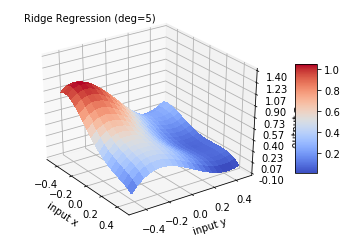

In [20]:
#testplot of the polynomial fit ridge regression (degree 5, lamda = 0.1)
xplot = np.arange(0, 1, 0.05)
yplot = np.arange(0, 1, 0.05)
xplot = xplot - samplemean(xplot)
yplot = yplot - samplemean(yplot)
fig = plt.figure()
ax = fig.gca(projection='3d')
lengthxplot=len(xplot)


beta=betaridge(x,y,z,5,0.01)


zplot=np.zeros((lengthxplot,lengthxplot))

for k in range(0,lengthxplot):
    xk=xplot[k]
    for j in range(0,lengthxplot):
        yj=yplot[j]
        
        designmatrixrow = np.array([1,xk,yj,xk**2, xk*yj, yj**2, \
                                   xk**3, xk**2*yj, xk*yj**2, yj**3, \
                                   xk**4, xk**3*yj, xk**2*yj**2, xk*yj**3,yj**4, \
                                   xk**5, xk**4*yj, xk**3*yj**2, xk**2*yj**3,xk*yj**4,yj**5 \
                                   ])
        zplot[j,k]=designmatrixrow.dot(beta)
                                   
xplot, yplot = np.meshgrid(xplot,yplot)

# Plot the surface.
surf = ax.plot_surface(xplot, yplot, zplot, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Set rotation angle to -35 degrees
ax.view_init(azim=-35)

# Customize the axis
ax.text2D(0.05, 0.95, "Ridge Regression (deg=5)", transform=ax.transAxes)
plt.xlabel('input x')
plt.ylabel('input y')
ax.set_zlabel('output z')
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

    




In [21]:
# function predicting the test target values by applying the coefficients gained through the training data

def zpredict_cv(x,y,degree,beta):          
    #input1 : x-vector test
    #input2 : y-vector test
    #input3 : degree of polynomial for fit
    #input4 : beta from training
    #output : predicted values with linear regression coefficients calculated with xtrain,ytrain
    
    Xtrain = np.c_[np.ones((len(x),1)),designmatrix(x,y,degree)]
    zpredict = Xtrain.dot(beta)

    
    return zpredict

In [22]:
# k-crossvalidation, we choose k =10, that means we get 10 partitions
k=10

import random
#generating random partitions of our data 

#generating random order of data points
for j in range(0,len(z)):
    switchindex = random.choice(range(0,len(z)))
    switchvalueX = x[j]
    switchvalueY = y[j]
    switchvalueZ = z[j]
    switchvalueZ_= z_[j]
    x[j] =x[switchindex]
    y[j] =y[switchindex]
    z[j] =z[switchindex]
    z_[j]=z_[switchindex]
    x[switchindex] =switchvalueX
    y[switchindex] =switchvalueY
    z[switchindex] =switchvalueZ
    z_[switchindex]=switchvalueZ_

    
partitionsize = int(len(z)/k)
index = 0
lamdav=np.array([1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000])
lengthl=len(lamdav)
resultmatrixMSE=np.empty([k,lengthl])
resultmatrixR2=np.empty([k,lengthl])

mean_MSE_R2 = np.c_[(np.array(range(2,6))),np.zeros(4),np.zeros(4)]     #Matrix containing average MSE & R2 per degree
#making sure there are zeros in the matrix
for j in range(0,4):
    mean_MSE_R2[j][1]=0
    mean_MSE_R2[j][2]=0


partitionnumber = 1
for k in range(1,k+1):
    print('Partition ',partitionnumber)
    print()
    testx = x[index:index+partitionsize]                                #testdata
    testy = y[index:index+partitionsize]
    testz = z[index:index+partitionsize]
    testz_= z_[index:index+partitionsize]
    trainingx =  np.concatenate((x[:index],x[index+partitionsize:]))    #trainingdata
    trainingy =  np.concatenate((y[:index],y[index+partitionsize:]))
    trainingz =  np.concatenate((z[:index],z[index+partitionsize:]))
    trainingz_=  np.concatenate((z_[:index],z_[index+partitionsize:]))

    
    degree = 5
    print(' degree ',degree)
    for l in range(0,lengthl):
        betatrain = betaridge(trainingx,trainingy,trainingz,degree,lamdav[l])   #regression coefficients
    
        ztestpredict = zpredict_cv(testx,testy,degree,betatrain)                #predicting values for the testset
    
        MSEtest = MSE(testz_,ztestpredict)                                       #comparing predicted and real value
        R2scotest = R2score(testz_,ztestpredict)
        
        print('   lamda : ',lamdav[l])
        print('   MSE   : ',MSEtest)
        print('   R2    : ',R2scotest)
        
        resultmatrixMSE[k-1][l]=MSEtest
        resultmatrixR2[k-1][l]=R2scotest
        
    print()
    index = index+partitionsize
    partitionnumber += 1
    
    
print('----------------------------------------------------------------')
print()


Partition  1

 degree  5
   lamda :  1e-05
   MSE   :  0.0024022940386175884
   R2    :  0.964530600284462
   lamda :  0.0001
   MSE   :  0.002353171647917646
   R2    :  0.9652558827364476
   lamda :  0.001
   MSE   :  0.0023949543511677636
   R2    :  0.9646389693282842
   lamda :  0.01
   MSE   :  0.0031892070357812403
   R2    :  0.9529119844160184
   lamda :  0.1
   MSE   :  0.0041920624610461464
   R2    :  0.9381050210036269
   lamda :  1.0
   MSE   :  0.007561828806216136
   R2    :  0.888351082674919
   lamda :  10.0
   MSE   :  0.011413708500123545
   R2    :  0.8314788354299536
   lamda :  100.0
   MSE   :  0.028989164599500312
   R2    :  0.5719806776064347
   lamda :  1000.0
   MSE   :  0.06077581791792364
   R2    :  0.10265698365130627

Partition  2

 degree  5
   lamda :  1e-05
   MSE   :  0.002610690134001718
   R2    :  0.9720528554974954
   lamda :  0.0001
   MSE   :  0.002613808529790244
   R2    :  0.9720194734210158
   lamda :  0.001
   MSE   :  0.0029842290079413

In [23]:
print(lamdav)
MSEmeanperlamda=np.empty([lengthl])
for k in range(0,lengthl):
    MSEmeanperlamda[k]=samplemean(resultmatrixMSE[:,k])
    
print(MSEmeanperlamda)

[   0.00001    0.0001     0.001      0.01       0.1        1.
   10.       100.      1000.     ]
[0.002498 0.002501 0.002835 0.004345 0.006897 0.012453 0.019132 0.040825
 0.075109]


In [24]:
R2meanperlamda=np.empty([lengthl])
for k in range(0,lengthl):
    R2meanperlamda[k]=samplemean(resultmatrixR2[:,k])
print(lamdav)    
print(R2meanperlamda)


[   0.00001    0.0001     0.001      0.01       0.1        1.
   10.       100.      1000.     ]
[0.969369 0.969352 0.965363 0.9472   0.916633 0.849268 0.769252 0.510744
 0.097389]


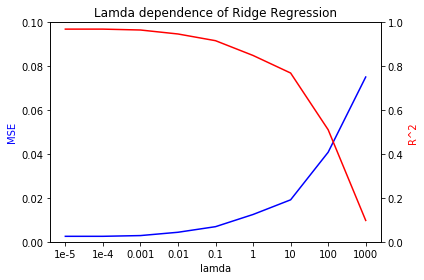

In [25]:
lamdaaxis=np.array(range(1,lengthl+1))
fig, ax1 = plt.subplots()
plot =plt.plot()
plt.plot(lamdaaxis,MSEmeanperlamda,'b-')
plt.xticks(range(1,lengthl+1),('1e-5','1e-4','0.001','0.01','0.1','1','10','100','1000'))

plt.xlabel('lamda')
plt.ylabel('MSE', color='b')

ax1.set_ylim(0,0.1)

ay2 = plt.twinx()
ay2.plot(lamdaaxis,R2meanperlamda,'r-')
ay2.set_ylabel('R^2',color='r')
plt.title('Lamda dependence of Ridge Regression')
ay2.set_ylim(0, 1)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [26]:
#control with sklearn if the values are reasonable

import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
xy=np.c_[x,y]
poly5 = PolynomialFeatures(degree=5)
XY = poly5.fit_transform(xy)
ridge5 = Ridge(alpha=lamda)
ridge5.fit(XY,z)
a=ridge5.intercept_
b=ridge5.coef_
b[0]=a
print('skl',b)
print('self',betaridge(x,y,z,5,lamda))

zpredict5_self=zpredict_f(x,y,z,5,lamda)
zpredict5_sk = ridge5.predict(XY)

MSE_self=MSE(z,zpredict5_self)
MSE_self2=mean_squared_error(z,zpredict5_self)
MSE_sk=mean_squared_error(z,zpredict5_sk)
R2_self=r2_score(z,zpredict5_self)
R2_sk=r2_score(z,zpredict5_sk)

print('MSE_self MSE   ',MSE_self)
print('MSE_self msesk ',MSE_self2)
print('MSE_sk         ',MSE_sk)
print('R2_self        ',R2_self)
print('R2_sk         ',R2_sk)

skl [ -0.06026   -0.351829  -1.491843   2.292129   1.876896   0.656759
  -0.176389  -1.779174  -4.899481   7.086084 -10.120917  -5.024966
  -0.561021  -1.855269  -3.966688   2.240776  12.45251    8.106757
  -3.013155  10.776171  -8.777119]
self [ 0.39706  -0.333657 -1.477908  1.646034  1.848309 -0.00899  -0.312337
 -1.829715 -4.986636  6.921563 -8.346137 -4.885244  1.177381 -1.713105
 -2.117947  2.488455 12.51715   8.299151 -2.638225 10.91646  -8.275152]
MSE_self MSE    0.16618020965910907
MSE_self msesk  0.16618020965910915
MSE_sk          0.00585848936310934
R2_self         -0.9776680322822004
R2_sk          0.9302796214142846
